In [1]:
import import_ipynb
import pandas as pd
from APS_system_package.data_clean import train_data_clean, test_data_clean, test_data_clean_v2
from APS_system_package.preprocessing import *
from APS_system_package.logistic_regressions import *
from APS_system_package.performance_measure import *
import seaborn as sns
sns.set()
import time

importing Jupyter notebook from C:\Users\shuxg\Desktop\EIT\Proj 4 - Logistic\APS_system_package\data_clean.ipynb
importing Jupyter notebook from C:\Users\shuxg\Desktop\EIT\Proj 4 - Logistic\APS_system_package\preprocessing.ipynb
importing Jupyter notebook from C:\Users\shuxg\Desktop\EIT\Proj 4 - Logistic\APS_system_package\logistic_regressions.ipynb
importing Jupyter notebook from C:\Users\shuxg\Desktop\EIT\Proj 4 - Logistic\APS_system_package\performance_measure.ipynb


**load dataframes**

In [10]:
df_trn = pd.read_csv('cleaned_train.csv')
df_val = test_data_clean_v2('test.csv', df_trn, 'median')

Nan: 0


**preprocessing**

In [11]:
data_trn = df_trn.to_numpy()
X_trn, y_trn = data_trn[:, 1:], data_trn[:, 0]
normalizer = MaxMinNormalization(X_trn)
X_trn = normalizer.fit(X_trn)

data_val = df_val.to_numpy()
X_val, y_val = data_val[:, 1:], data_val[:, 0]
X_val = normalizer.fit(X_val)

**build model**

In [12]:
model = WeightedLogisticRegression(X_trn.shape[1])
J_trn = np.zeros(1)
J_val = np.zeros(1)
cost_trn = np.zeros(1)
cost_val = np.zeros(1)

**train model**

In [1]:
start = time.time()
for epoch in range(50000):
    J = model.fit(X_trn, y_trn, X_val, y_val, eta = 1, lr = 1e-2, epochs = 1, show_curve = False)
    
    # calculate trn cost
    c_trn, t = min_cost_threshold(X_trn, y_trn, model, step_thresh = 10)
    
    # calculate val cost
    y_hat = model.predict(X_val, t)
    val_cm = confusion_matrix(y_val, y_hat).to_numpy()
    c_val = val_cm[1,0] * 500 + val_cm[0,1] * 10
    
    # save loss
    J_trn = np.hstack((J_trn, J['J_trn']))
    J_val = np.hstack((J_val, J['J_val']))
    # save cost
    cost_trn = np.hstack((cost_trn, c_trn))
    cost_val = np.hstack((cost_val, c_val))
    
    # print process
    if epoch % 100 == 0:
        end = time.time() - start
        print('EPOCH: {}'.format(epoch))
        print('trn loss: {:.4f}, val loss {:.4f}'.format(J_trn[-1], J_val[-1]))
        print('trn cost: {:.0f}, val cost {:.0f}'.format(cost_trn[-1], cost_val[-1]))
        print('time: {:.0f} s'.format((end)))
        print('----------------------------------------')
        start = time.time()
    if cost_val[-1] < 15000:
        print('trn cost: {:.0f}, val cost {:.0f}'.format(cost_trn[-1], cost_val[-1]))
        params = np.hstack((model.w, model.b))
        np.save('model_basic_logreg_score_'+str(int(cost_val[-1])), params)
        print('----------------------------------------')
        break

**check result**

In [14]:
# calculate trn cost
c_trn, t = min_cost_threshold(X_trn, y_trn, model, step_thresh = 10)
# calculate val cost
y_hat = model.predict(X_val, t)
val_cm = confusion_matrix(y_val, y_hat).to_numpy()
c_val = val_cm[1,0] * 500 + val_cm[0,1] * 10
print('min train cost {:.0f} at threshold value {:.4f}'.format(c_trn, t))
print('test cost: {}'.format(c_val))

min train cost 55120 at threshold value 0.3333
test cost: 31400


**plot result**

Text(0.5, 1.0, 'Loss')

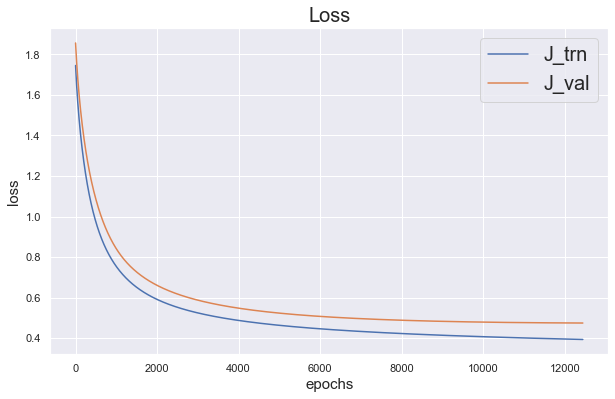

In [15]:
plt.figure(figsize = (10, 6))
plt.plot(J_trn[1:])
plt.plot(J_val[1:])
plt.xlabel('epochs', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.legend(['J_trn', 'J_val'], fontsize = 20)
plt.title('Loss', fontsize = 20)

Text(0.5, 1.0, 'Cost')

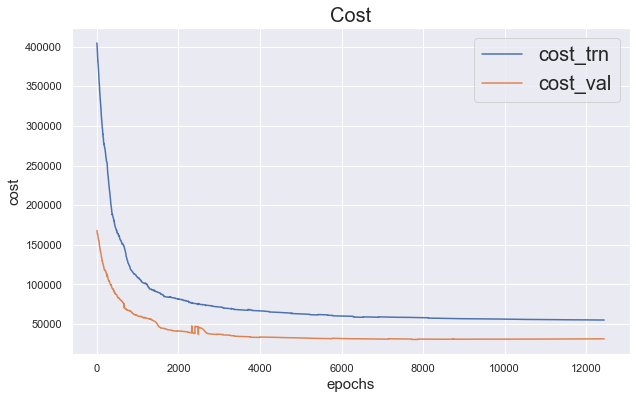

In [16]:
plt.figure(figsize = (10, 6))
plt.plot(cost_trn[1:])
plt.plot(cost_val[1:])
plt.xlabel('epochs', fontsize = 15)
plt.ylabel('cost', fontsize = 15)
plt.legend(['cost_trn', 'cost_val'], fontsize = 20)
plt.title('Cost', fontsize = 20)

### Evaluate model with mean, mode and zero

**impute test with mean**

In [18]:
df_val = test_data_clean_v2('test.csv', df_trn, 'mean')
data_val = df_val.to_numpy()
X, y = data_val[:, 1:], data_val[:, 0]
X = normalizer.fit(X)
# calculate val cost
y_hat = model.predict(X, t)
val_cm = confusion_matrix(y, y_hat).to_numpy()
c_val = val_cm[1,0] * 500 + val_cm[0,1] * 10
print(c_val)

31330


**impute test with mode**

In [19]:
df_val = test_data_clean_v2('test.csv', df_trn, 'mode')
data_val = df_val.to_numpy()
X, y = data_val[:, 1:], data_val[:, 0]
X = normalizer.fit(X)
# calculate val cost
y_hat = model.predict(X, t)
val_cm = confusion_matrix(y, y_hat).to_numpy()
c_val = val_cm[1,0] * 500 + val_cm[0,1] * 10
print(c_val)

Nan: 0
31380


**impute test with zero**

In [20]:
df_val = test_data_clean_v2('test.csv', df_trn, None)
data_val = df_val.to_numpy()
X, y = data_val[:, 1:], data_val[:, 0]
X = normalizer.fit(X)
# calculate val cost
y_hat = model.predict(X, t)
val_cm = confusion_matrix(y, y_hat).to_numpy()
c_val = val_cm[1,0] * 500 + val_cm[0,1] * 10
print(c_val)

31810
